In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from itertools import product
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
df = aux.load_data(Path("../results_synced/ratio/"))
#df.groupby(["dataset", "arch", "nsamp_tra", "nsamp_pre"]).count()
#df = df[df["fold_number"] == 1]
#df[df["pretrained"]]["target_best_model"].str.split("/").str[6].str.removeprefix("epoch=").str.split("-").str[0].astype(int).hist()
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_size,target_val_acc,target_val_f1,target_val_auroc,...,target_nepochs,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_acc,pretrain_val_f1,pretrain_val_auroc,pretrain_best_model,pretrain_train_csv,pretrain_nepochs
0,Plane,CNN_TS,False,4,0,128,5,0.289062,0.289062,0.215781,...,120,1235,0,6033,NaN,NaN,NaN,NaN,NaN,NaN
1,Plane,CNN_TS,True,4,0,128,5,0.351562,0.351562,0.225412,...,120,1235,3654,6033,0.822049,0.822049,0.965986,training/exp/EXP_ratio_f4.0_2023-03-12_11-17/l...,training/exp/EXP_ratio_f4.0_2023-03-12_11-17/l...,60.0
2,Plane,CNN_TS,True,4,0,128,5,0.304688,0.304688,0.213836,...,120,1235,7308,6033,0.851562,0.851562,0.975919,training/exp/EXP_ratio_f4.0_2023-03-12_11-27/l...,training/exp/EXP_ratio_f4.0_2023-03-12_11-27/l...,60.0
3,Plane,CNN_TS,True,4,0,128,5,0.348958,0.348958,0.216464,...,120,1235,10963,6033,0.853516,0.853516,0.976317,training/exp/EXP_ratio_f4.0_2023-03-12_11-38/l...,training/exp/EXP_ratio_f4.0_2023-03-12_11-38/l...,60.0
4,Plane,CNN_TS,True,4,0,128,5,0.307292,0.307292,0.224701,...,120,1235,14617,6033,0.848067,0.848067,0.976117,training/exp/EXP_ratio_f4.0_2023-03-12_11-50/l...,training/exp/EXP_ratio_f4.0_2023-03-12_11-50/l...,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,PowerCons,RNN_TS,True,4,0,128,5,0.402065,0.402065,0.678563,...,120,10497,6246,10353,0.739258,0.739258,0.927090,training/exp/EXP_ratio_f4.4_2023-03-10_14-56/l...,training/exp/EXP_ratio_f4.4_2023-03-10_14-56/l...,60.0
2507,PowerCons,RNN_TS,True,4,0,128,5,0.490792,0.490792,0.632572,...,120,10497,12492,10353,0.785156,0.785156,0.947730,training/exp/EXP_ratio_f4.4_2023-03-10_15-10/l...,training/exp/EXP_ratio_f4.4_2023-03-10_15-10/l...,60.0
2508,PowerCons,RNN_TS,True,4,0,128,5,0.404576,0.404576,0.652426,...,120,10497,18739,10353,0.810427,0.810427,0.952242,training/exp/EXP_ratio_f4.4_2023-03-10_15-26/l...,training/exp/EXP_ratio_f4.4_2023-03-10_15-26/l...,60.0
2509,PowerCons,RNN_TS,True,4,0,128,5,0.402344,0.402344,0.687184,...,120,10497,24985,10353,0.811899,0.811899,0.953872,training/exp/EXP_ratio_f4.4_2023-03-10_15-44/l...,training/exp/EXP_ratio_f4.4_2023-03-10_15-44/l...,60.0


In [3]:
xd = df[df["pretrained"] == False].groupby(["arch", "dataset", "nsamp_tra"])["target_test_acc"].mean().reset_index()
xd[xd["dataset"] == "GunPoint"]#[xd["nsamp_tra"] == 3417]

,arch,dataset,nsamp_tra,target_test_acc
5,CNN_DFS,GunPoint,1227,0.499824
6,CNN_DFS,GunPoint,2454,0.559281
7,CNN_DFS,GunPoint,3681,0.553822
8,CNN_DFS,GunPoint,4908,0.652508
9,CNN_DFS,GunPoint,6135,0.676410
26,CNN_TS,GunPoint,1227,0.507167
27,CNN_TS,GunPoint,2454,0.504687
28,CNN_TS,GunPoint,3681,0.506522
29,CNN_TS,GunPoint,4908,0.504687
30,CNN_TS,GunPoint,6135,0.535292


In [3]:
# how many are done?
df.groupby(["arch", "dataset"])["pretrained"].count()

arch       dataset  
CNN_DFS    Coffee       150
           GunPoint     150
           Plane          5
           PowerCons    150
CNN_TS     CBF           58
           Coffee       150
           GunPoint     150
           Plane        150
           PowerCons    150
RNN_TS     CBF          104
           Coffee       150
           GunPoint     150
           Plane        150
           PowerCons    150
ResNet_TS  CBF           94
           Coffee       150
           GunPoint     150
           Plane        150
           PowerCons    150
Name: pretrained, dtype: int64

In [4]:
dfp = aux.EXP_ratio_preprocessing(df)
dfp

,arch,dataset,nsamp_pre,nsamp_tra,pretrain_val_acc_mean,pretrain_val_acc_std,pretrain_val_auroc_mean,pretrain_val_auroc_std,pretrain_val_f1_mean,pretrain_val_f1_std,...,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_TS,CBF,0,4783,NaN,NaN,NaN,NaN,NaN,NaN,...,0.564289,0.002007,0.420967,0.043866,0.443359,0.064450,0.564604,0.031514,0.443359,0.064450
1,CNN_TS,CBF,14307,4783,0.519531,0.001642,0.825698,0.005299,0.519531,0.001642,...,0.560123,0.008848,0.405997,0.019051,0.423177,0.021176,0.577249,0.008366,0.423177,0.021176
2,CNN_TS,CBF,28614,4783,0.502375,0.000075,0.815308,0.006426,0.502375,0.000075,...,0.575291,0.000958,0.430279,0.028069,0.434896,0.032225,0.582962,0.012111,0.434896,0.032225
3,CNN_TS,CBF,42921,4783,0.507568,0.003206,0.822896,0.000291,0.507568,0.003206,...,0.564021,0.001691,0.416976,0.020544,0.439779,0.002302,0.574599,0.026130,0.439779,0.002302
4,CNN_TS,CBF,57228,4783,0.513973,0.004190,0.823824,0.003411,0.513973,0.004190,...,0.555634,0.003088,0.423902,0.001792,0.436523,0.025320,0.584600,0.004169,0.436523,0.025320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,ResNet_TS,PowerCons,6246,10497,0.753711,0.021797,0.923929,0.010035,0.753711,0.021797,...,0.685795,0.045565,0.639082,0.030547,0.641964,0.030242,0.671834,0.039731,0.641964,0.030242
541,ResNet_TS,PowerCons,12492,10497,0.774072,0.027437,0.931332,0.010699,0.774072,0.027437,...,0.664462,0.049428,0.639160,0.022064,0.645201,0.025030,0.648952,0.037889,0.645201,0.025030
542,ResNet_TS,PowerCons,18739,10497,0.748182,0.063694,0.918023,0.004039,0.748182,0.063694,...,0.658791,0.064523,0.639375,0.035300,0.642634,0.019751,0.644991,0.061830,0.642634,0.019751
543,ResNet_TS,PowerCons,24985,10497,0.785505,0.014284,0.931543,0.007297,0.785505,0.014284,...,0.680848,0.035912,0.641934,0.017292,0.643862,0.024445,0.658706,0.050326,0.643862,0.024445


In [5]:
dfpb = aux.EXP_ratio_set_baselines(dfp)
dfpb

,arch,dataset,nsamp_pre,nsamp_tra,target_test_acc_mean,target_test_acc_std,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_DFS,Coffee,1998,683,0.096159,0.066614,0.077905,0.056094,0.096159,0.066614,0.509375,0.0222,0.790327,0.02552,0.509375,0.0222
1,CNN_DFS,Coffee,3997,683,0.087755,0.068982,0.08031,0.047201,0.087755,0.068982,0.49375,0.069307,0.798097,0.067322,0.49375,0.069307
2,CNN_DFS,Coffee,5996,683,0.084255,0.064366,0.078109,0.047317,0.084255,0.064366,0.503125,0.044913,0.824105,0.075325,0.503125,0.044913
3,CNN_DFS,Coffee,7995,683,0.062164,0.05168,0.078518,0.047851,0.062164,0.05168,0.40625,0.085492,0.790994,0.080498,0.40625,0.085492
4,CNN_DFS,Coffee,9995,683,0.06868,0.062299,0.081438,0.033925,0.06868,0.062299,0.43125,0.085162,0.819901,0.072453,0.43125,0.085162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,ResNet_TS,PowerCons,6246,10497,0.001797,0.061133,0.016653,0.105025,0.001797,0.061133,0.004464,0.062723,0.012141,0.09738,0.004464,0.062723
450,ResNet_TS,PowerCons,12492,10497,0.001875,0.052651,-0.004679,0.108888,0.001875,0.052651,0.007701,0.057511,-0.010742,0.095537,0.007701,0.057511
451,ResNet_TS,PowerCons,18739,10497,0.00209,0.065887,-0.010351,0.123983,0.00209,0.065887,0.005134,0.052232,-0.014702,0.119479,0.005134,0.052232
452,ResNet_TS,PowerCons,24985,10497,0.004648,0.047879,0.011706,0.095372,0.004648,0.047879,0.006362,0.056927,-0.000987,0.107975,0.006362,0.056927


In [6]:
print(dfp.arch.unique())
print(dfp.dataset.unique())

['CNN_TS' 'RNN_TS' 'ResNet_TS' 'CNN_DFS']
['CBF' 'Coffee' 'GunPoint' 'Plane' 'PowerCons']


arch       dataset  
CNN_DFS    Coffee       0.023252
           GunPoint     0.007313
           Plane        0.056017
           PowerCons   -0.031094
CNN_TS     CBF          0.034840
           Coffee       0.058829
           GunPoint     0.058798
           Plane        0.006882
           PowerCons    0.014375
RNN_TS     CBF         -0.013739
           Coffee       0.021980
           GunPoint     0.032880
           Plane        0.025299
           PowerCons    0.000215
ResNet_TS  CBF         -0.021368
           Coffee       0.018314
           GunPoint     0.007914
           Plane        0.011004
           PowerCons   -0.007598
Name: target_test_acc_mean, dtype: float64


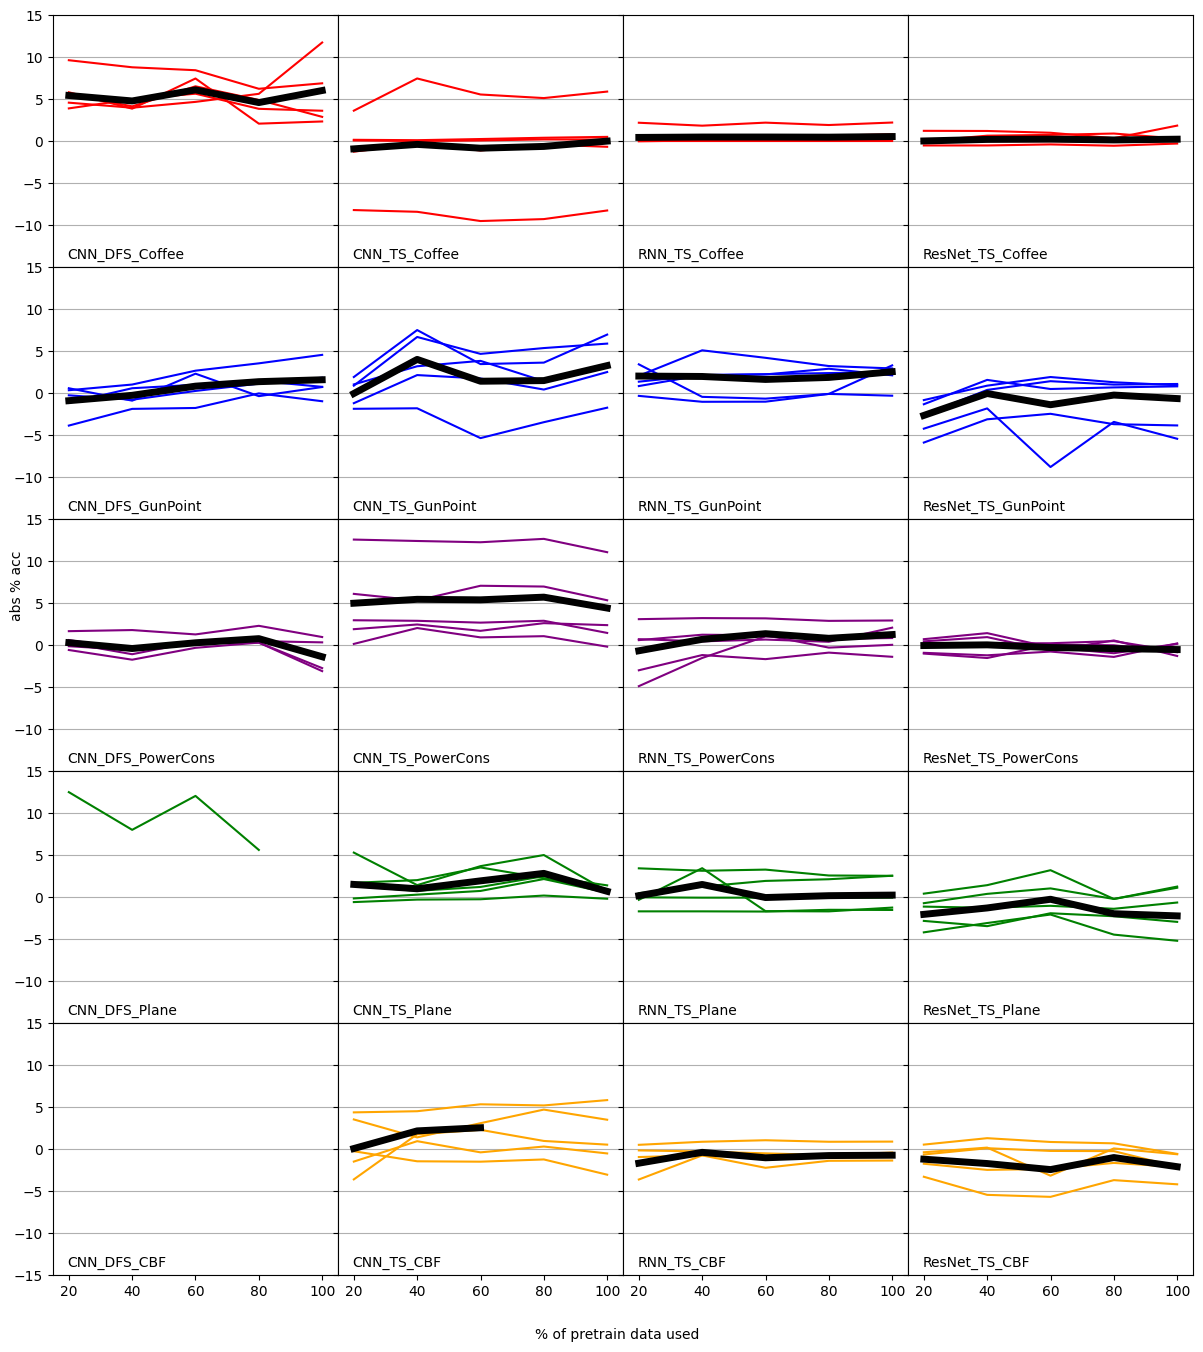

In [7]:
archs = ['CNN_DFS', 'CNN_TS', 'RNN_TS', 'ResNet_TS']
dsets = ['Coffee', 'GunPoint', 'PowerCons', "Plane", "CBF"]

n_rows = len(dsets)
n_cols = len(archs)

fig = plt.figure(figsize=[3*n_cols, 3*n_rows])
gs = fig.add_gridspec(n_rows, n_cols, 
    left=0.03, right=0.98, bottom=0.04,
    wspace=0., hspace=0
    )

metric = "acc"

colors = {
    "GunPoint": "blue",
    "Coffee": "red",
    "PowerCons": "purple",
    "Plane": "green",
    "CBF": "orange"
}

axes: dict[str, plt.Axes] = {}
for i, arch in enumerate(archs):
    for j, dset in enumerate(dsets):
        axes[f"{arch}_{dset}"] = fig.add_subplot(gs[j,i])

for arch_dset in axes:
    
    ax = axes[arch_dset]
    
    ax.set_xlim(15, 105)
    ax.set_xticks(np.arange(20,101,20))

    ax.set_ylim(-15, 15)
    
    ax.grid(axis="y")

    if archs[0] not in arch_dset:
        ax.set_yticklabels([])

    if dsets[-1] not in arch_dset:
        ax.set_yticks([-10, -5, 0, 5, 10, 15])
        ax.set_xticklabels([])
    else:
        ax.set_yticks([-15, -10, -5, 0, 5, 10, 15])

    ax.annotate(arch_dset, (0.05, 0.05), xycoords='axes fraction', va='center')


for (arch, dset, nsamp_tra), dfg in dfpb.groupby(["arch", "dataset", "nsamp_tra"]):
    x_values = [20, 40, 60, 80, 100]
    axes[f"{arch}_{dset}"].errorbar(x_values[:len(dfg)], dfg[f"target_test_{metric}_mean"]*100, 
        #yerr=dfg[f"target_test_{metric}_std"],         
        label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[dset])

for (arch, dset), dfg in dfpb.groupby(["arch", "dataset"]):
    x_values = [20, 40, 60, 80, 100]
    data = dfg.groupby("nsamp_pre").apply(lambda x: np.average(x[f"target_test_{metric}_mean"], weights=x[f"target_test_{metric}_std"]))
    axes[f"{arch}_{dset}"].errorbar(x_values[:len(dfg)], data*100, 
        #yerr=dfg[f"target_test_{metric}_std"],         
        label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c="black", lw=5)


fig.text(0,0.5, s= f"abs % {metric}", rotation="vertical", ha="center", va="center");
fig.text(0.5,0, s= "% of pretrain data used", rotation="horizontal", ha="center", va="center");

    
print(dfpb.groupby(["arch", "dataset"]).last()[f"target_test_{metric}_mean"])